In [83]:
import pyodbc
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-BKH32KF4\SQLEXPRESS;'
                      'Database=TT_Deputados;'
                      'Trusted_Connection=yes;')

In [122]:
#sql = 'SELECT Registro, txNomeParlamentar, cpf, sgUF, sgPartido, txtDescricao, numMes, numAno, vlrLiquido FROM TT_Deputados.dbo.[Ano-2021]'
#data = pd.read_sql(sql,conn)

sql = 'SELECT * FROM DEPUTADOSFATODIM'
data = pd.read_sql(sql,conn)

#sql = 'SELECT F.Registro, F.txNomeParlamentar, DNOME.Twitter, DNOME.Nome, F.cpf, F.sgUF, F.sgPartido, F.txtDescricao, F.numMes, F.numAno, F.vlrLiquido, FROM TT_Deputados.dbo.[Ano-2021] F INNER JOIN Deputados_Dim DNOME ON F.txNomeParlamentar = DNOME.Nome'
#data = pd.read_sql(sql,conn)

In [128]:
data

,Registro,txNomeParlamentar,Twitter,Nome,cpf,sgUF,sgPartido,txtDescricao,numMes,numAno,vlrLiquido
0,1000,Norma Ayub,–,Norma Ayub,28008901187,ES,DEM,COMBUSTÍVEIS E LUBRIFICANTES.,9,2021,282.010010
1,100000,Haroldo Cathedral,@ze_haroldo,Haroldo Cathedral,11914408691,RR,PSD,TELEFONIA,8,2021,2.850000
2,100001,Haroldo Cathedral,@ze_haroldo,Haroldo Cathedral,11914408691,RR,PSD,SERVIÇOS POSTAIS,7,2021,115.800003
3,100002,Haroldo Cathedral,@ze_haroldo,Haroldo Cathedral,11914408691,RR,PSD,SERVIÇOS POSTAIS,7,2021,115.800003
4,100003,Haroldo Cathedral,@ze_haroldo,Haroldo Cathedral,11914408691,RR,PSD,SERVIÇOS POSTAIS,8,2021,115.800003
...,...,...,...,...,...,...,...,...,...,...,...
108282,99995,Haroldo Cathedral,@ze_haroldo,Haroldo Cathedral,11914408691,RR,PSD,TELEFONIA,3,2021,0.310000
108283,99996,Haroldo Cathedral,@ze_haroldo,Haroldo Cathedral,11914408691,RR,PSD,TELEFONIA,4,2021,0.130000
108284,99997,Haroldo Cathedral,@ze_haroldo,Haroldo Cathedral,11914408691,RR,PSD,TELEFONIA,5,2021,0.640000
108285,99998,Haroldo Cathedral,@ze_haroldo,Haroldo Cathedral,11914408691,RR,PSD,TELEFONIA,6,2021,1.110000


In [129]:
#data['vlrDocumento'] = data['vlrDocumento'].str.replace(',','.')
data['vlrLiquido'] = pd.to_numeric(data['vlrLiquido'], downcast="float")
#data['numMes'] = pd.to_numeric(data['numMes'], downcast="int")


In [131]:
deputado = "Marcelo Freixo"
htgdeputado = "@MarceloFreixo"
datadeputado = data.loc[data['Twitter'] == htgdeputado]
datadeputado

,Registro,txNomeParlamentar,Twitter,Nome,cpf,sgUF,sgPartido,txtDescricao,numMes,numAno,vlrLiquido
31384,18121,Marcelo Freixo,@MarceloFreixo,Marcelo Freixo,95622780772,RJ,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,3,2021,95.599998
31385,18122,Marcelo Freixo,@MarceloFreixo,Marcelo Freixo,95622780772,RJ,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7,2021,240.000000
31386,18123,Marcelo Freixo,@MarceloFreixo,Marcelo Freixo,95622780772,RJ,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,4,2021,240.000000
31387,18124,Marcelo Freixo,@MarceloFreixo,Marcelo Freixo,95622780772,RJ,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,6,2021,36.000000
31388,18125,Marcelo Freixo,@MarceloFreixo,Marcelo Freixo,95622780772,RJ,PSB,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,4,2021,2964.949951
...,...,...,...,...,...,...,...,...,...,...,...
31538,18261,Marcelo Freixo,@MarceloFreixo,Marcelo Freixo,95622780772,RJ,PSB,PASSAGEM AÉREA - RPA,6,2021,965.679993
31539,18262,Marcelo Freixo,@MarceloFreixo,Marcelo Freixo,95622780772,RJ,PSB,PASSAGEM AÉREA - RPA,6,2021,2211.429932
31540,18263,Marcelo Freixo,@MarceloFreixo,Marcelo Freixo,95622780772,RJ,PSB,PASSAGEM AÉREA - RPA,6,2021,975.960022
31541,18264,Marcelo Freixo,@MarceloFreixo,Marcelo Freixo,95622780772,RJ,PSB,PASSAGEM AÉREA - RPA,6,2021,975.960022


In [87]:
#ax = datadeputado.plot.bar(x='numAno', y='vlrLiquido', rot=0, figsize=(40,40))

In [132]:
groupbymes = datadeputado.groupby("numMes").sum()
groupbymes

,vlrLiquido
numMes,
1,28888.878906
2,39666.539062
3,24462.208984
4,45552.667969
5,35735.308594
6,25166.599609
7,21899.160156
8,18872.169922
9,3306.439941


In [134]:
#ax2 = groupbymes.plot(x= 'numMes', y='vlrLiquido', rot=0, figsize=(40,40))
#type(groupbymes.plot.bar(figsize=(20,10)))
#ax = groupbymes.plot.bar(x='lab', y='val', rot=0)

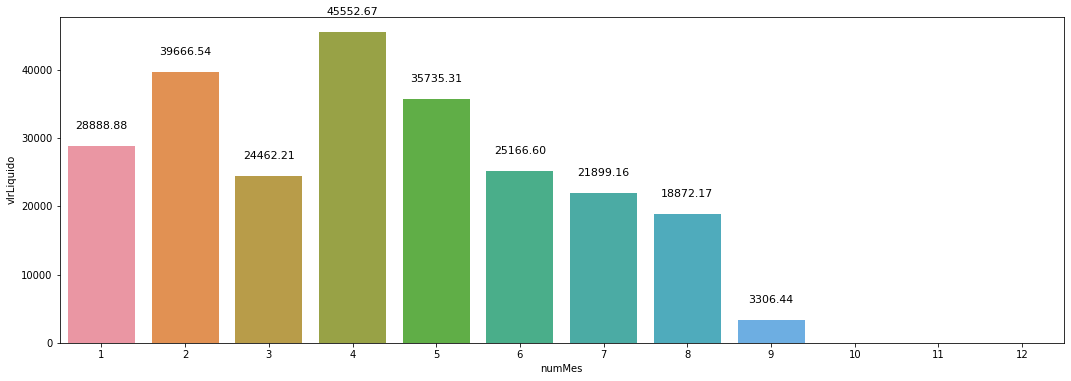

In [135]:
plt.figure(figsize=(18, 6))
g = sns.barplot(x="numMes",y="vlrLiquido",data=datadeputado, estimator=sum, ci=None, 
                order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

ax = g
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')

In [138]:
figura = g.get_figure()

In [139]:
type(figura)

matplotlib.figure.Figure